In [1]:
from supervised_utils import *

### Task di regressione su `score`

In [3]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
|   budget_efficiency   | float64 |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [ ]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}

***

TUNING & TRAINING <Ridge Regressor>...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.4926}

> TESTING...
MAE: 0.5378
MSE: 0.5462

***

TUNING & TRAINING <Decision Tree Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best score: {'mean_squared_error': 0.5237}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.5089}



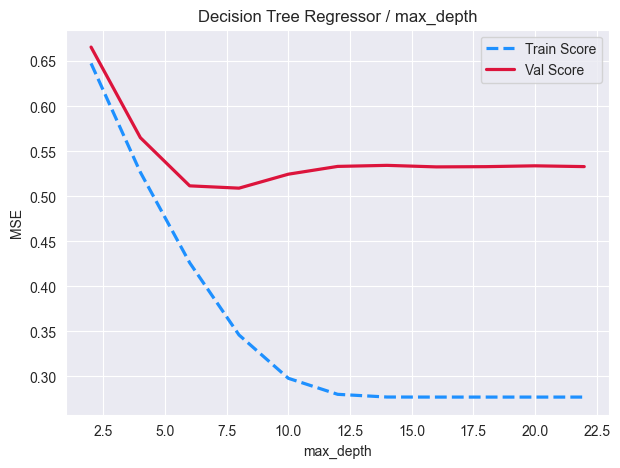

> TESTING...
MAE: 0.5908
MSE: 0.6695

***

TUNING & TRAINING <Random Forest Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.3888}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 350}
Best score: {'mean_squared_error': 0.3897}



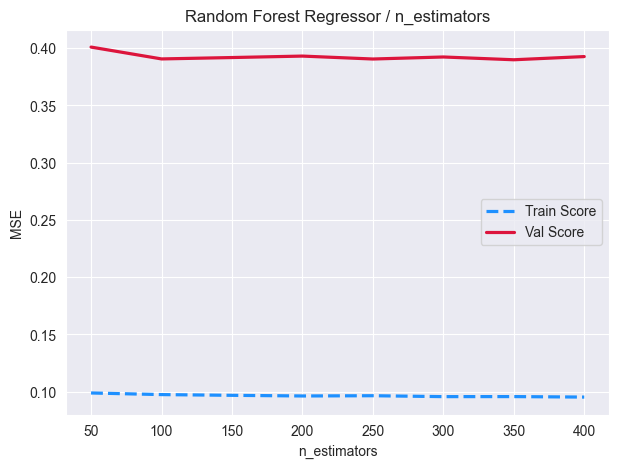

Results after max_depth tuning:
Best parameters: {'max_depth': 25}
Best score: {'mean_squared_error': 0.3901}



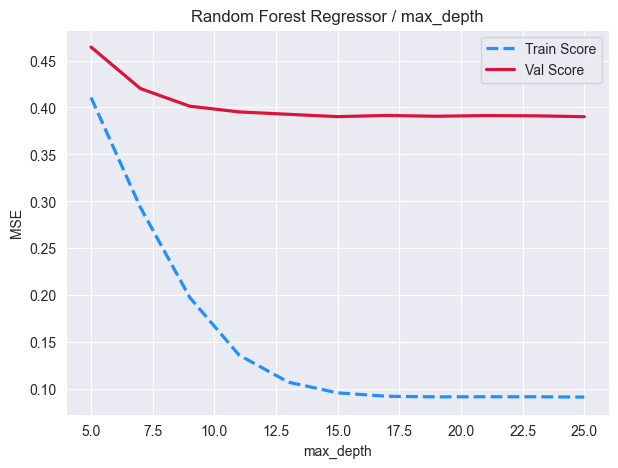

> TESTING...
MAE: 0.4816
MSE: 0.4649

***

TUNING & TRAINING <XGBoost Regressor>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.3729}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 250}
Best score: {'mean_squared_error': 0.3727}



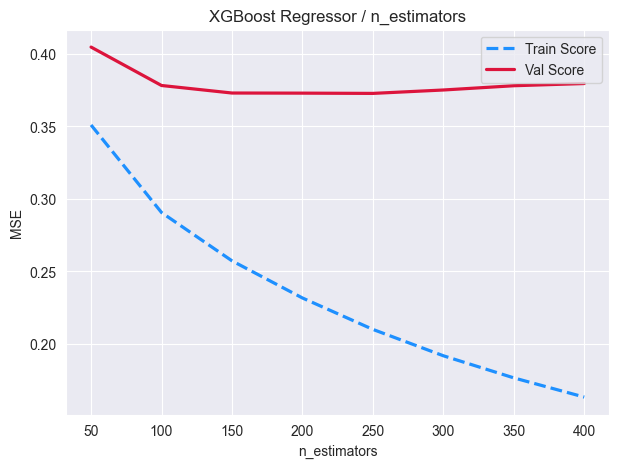

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.3758}



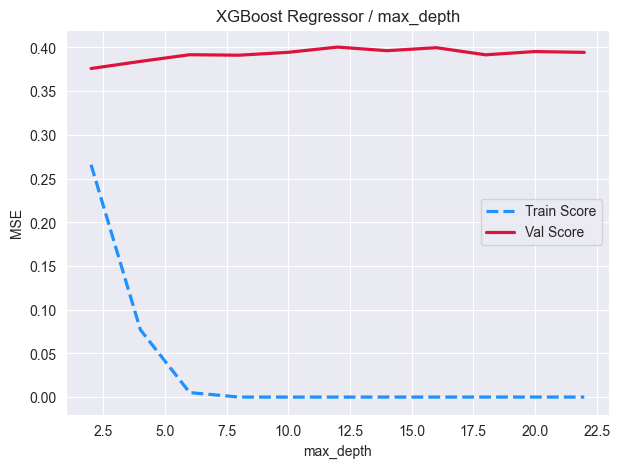

> TESTING...
MAE: 0.4819
MSE: 0.4830



In [5]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="v2")

### Task di classificazione su `budget_efficiency`

In [6]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
| budget_efficiency_cat | object  |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [ ]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "popularity"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["budget", "director_experience", "star_experience"]
}

#### Con classi sbilanciate

***

TUNING & TRAINING <Logistic Regression Classifier>...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}
Best score: {'accuracy': 0.6017}

> TESTING...
Accuracy: 57.53%



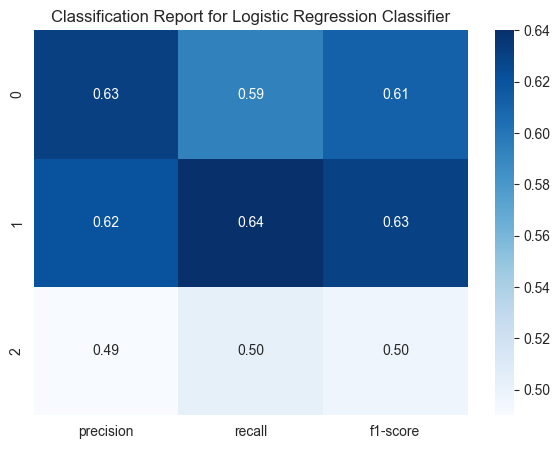

***

TUNING & TRAINING <Decision Tree Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: {'accuracy': 0.5946}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5973}



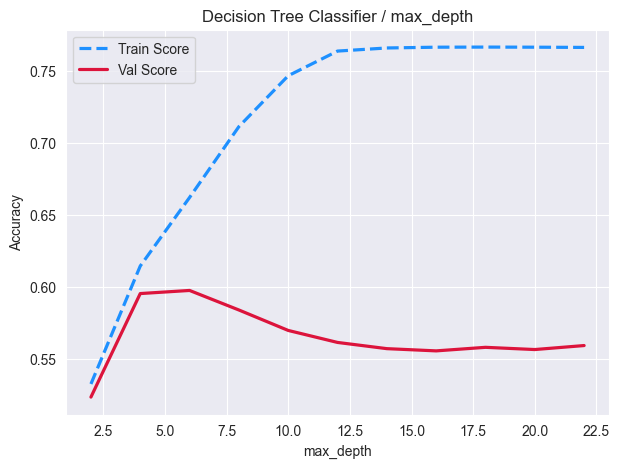

> TESTING...
Accuracy: 55.43%



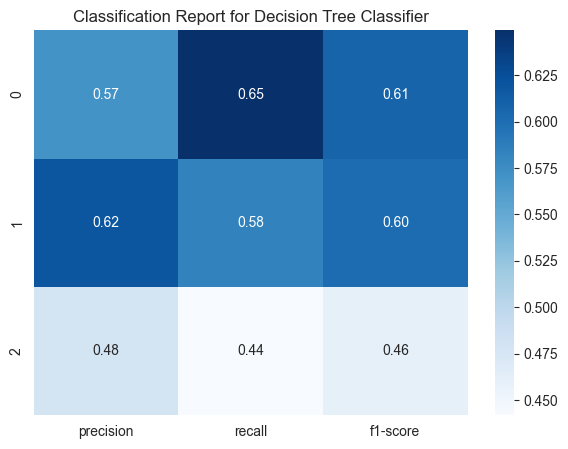

***

TUNING & TRAINING <Random Forest Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: {'accuracy': 0.6350}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'accuracy': 0.6292}



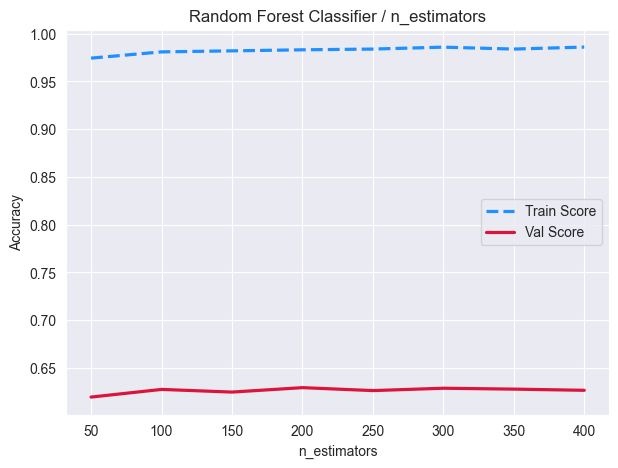

Results after max_depth tuning:
Best parameters: {'max_depth': 13}
Best score: {'accuracy': 0.6332}



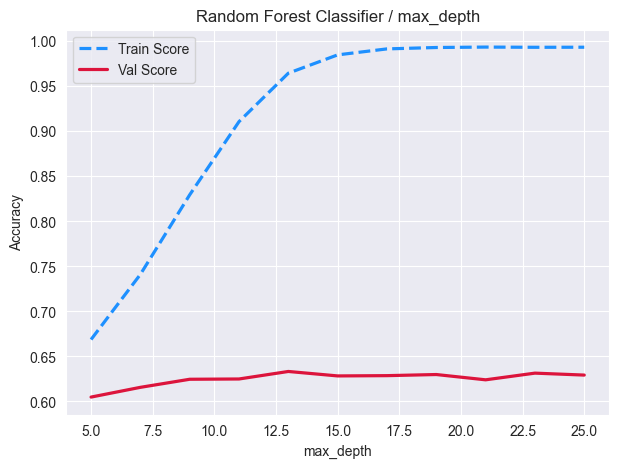

> TESTING...
Accuracy: 61.23%



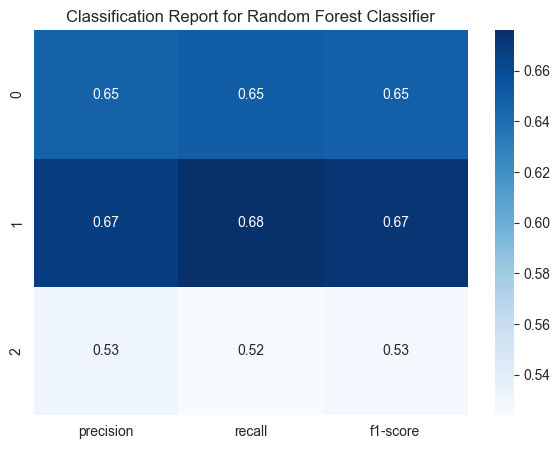

***

TUNING & TRAINING <XGBoost Classifier>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
Best score: {'accuracy': 0.6539}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 100}
Best score: {'accuracy': 0.6539}



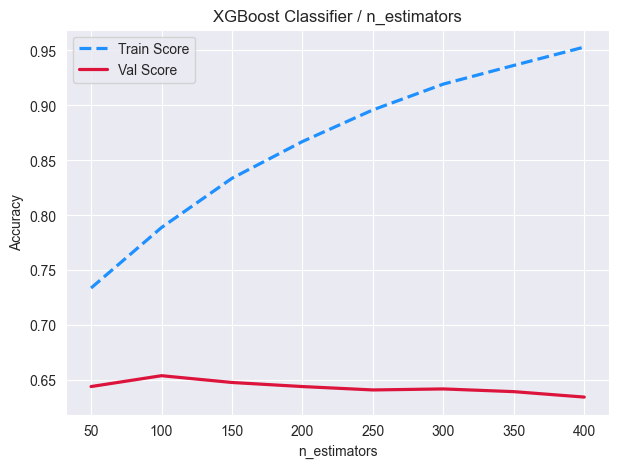

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.6502}



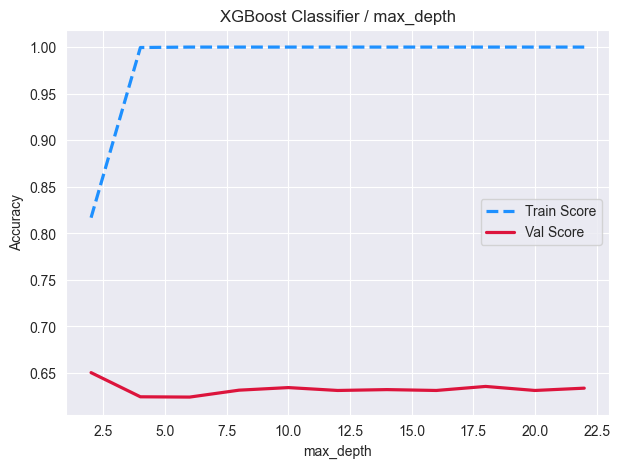

> TESTING...
Accuracy: 62.10%



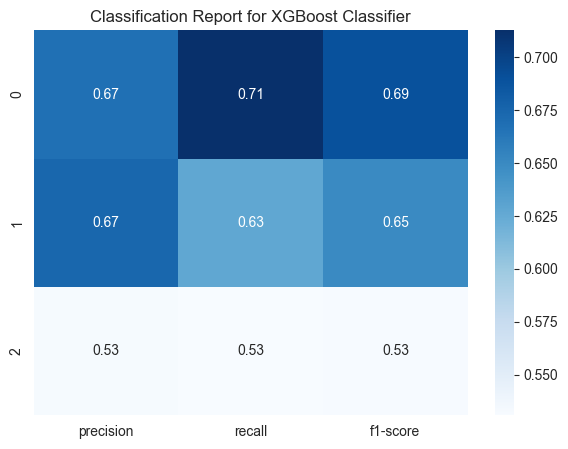

In [8]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="v2")

#### Con classi bilanciate

***

TUNING & TRAINING <Logistic Regression Classifier>...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}
Best score: {'accuracy': 0.6344}

> TESTING...
Accuracy: 59.01%



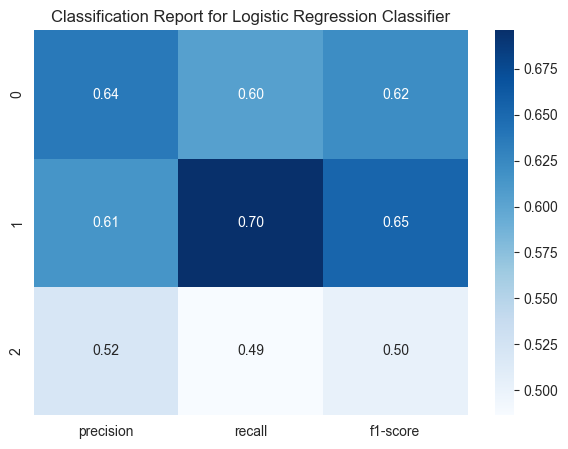

***

TUNING & TRAINING <Decision Tree Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'accuracy': 0.6056}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'accuracy': 0.6139}



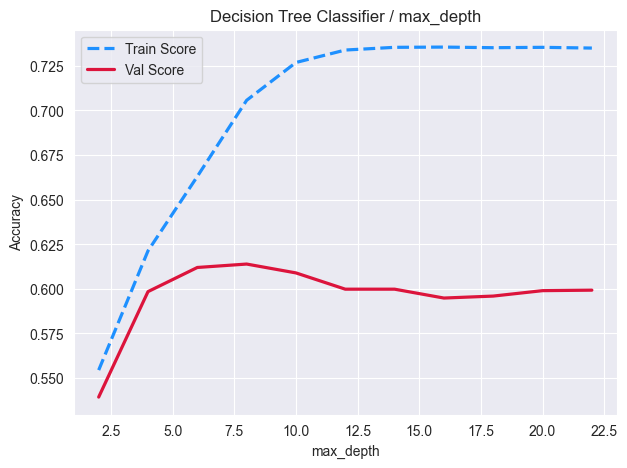

> TESTING...
Accuracy: 54.57%



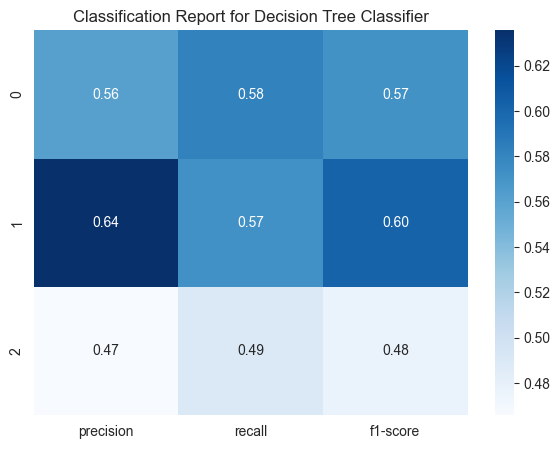

***

TUNING & TRAINING <Random Forest Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score: {'accuracy': 0.6592}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 100}
Best score: {'accuracy': 0.6603}



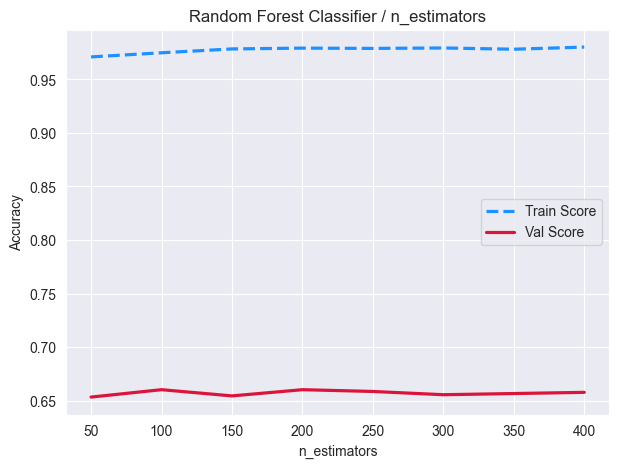

Results after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'accuracy': 0.6617}



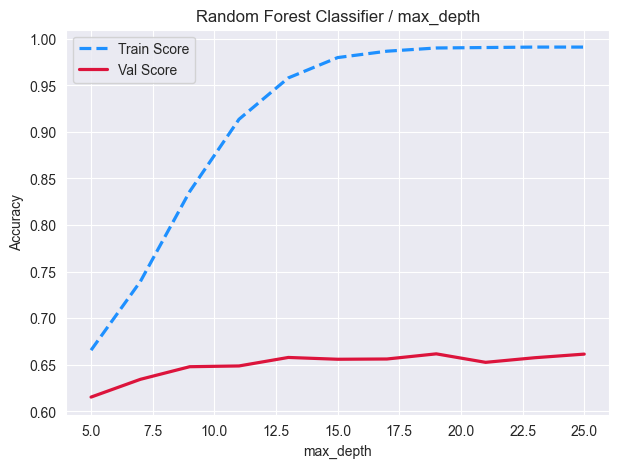

> TESTING...
Accuracy: 60.86%



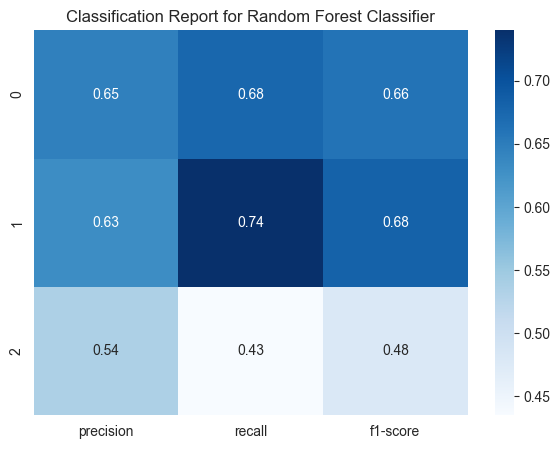

***

TUNING & TRAINING <XGBoost Classifier>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score: {'accuracy': 0.6777}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 150}
Best score: {'accuracy': 0.6780}



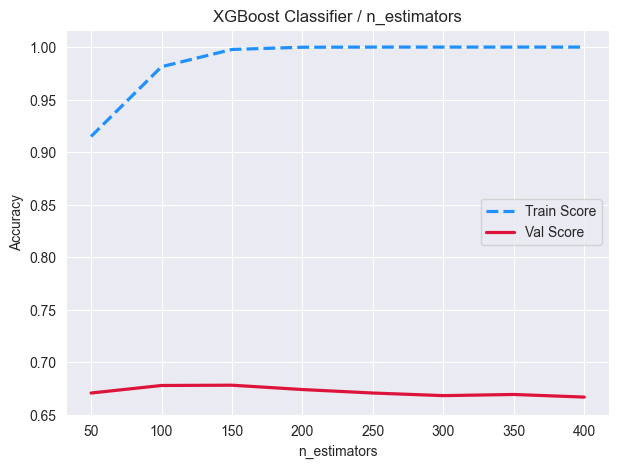

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.6774}



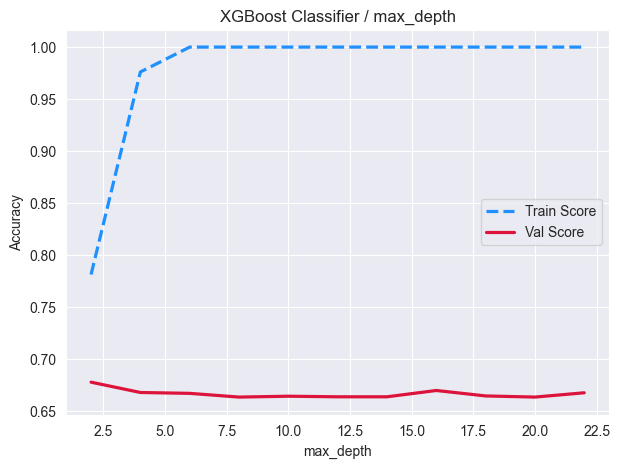

> TESTING...
Accuracy: 62.84%



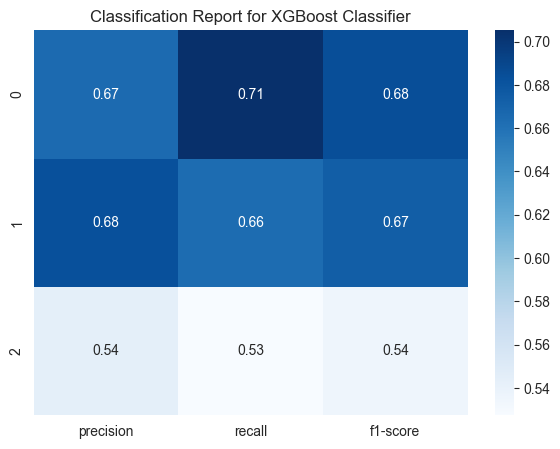

In [9]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=True, session_name="v2(resampled)")